## The model building is a step-by-step process with following 3 major steps:
1. Algorithm Selection
2. Training Model
3. Predicting

# Data Exploration

Analysing the dataset is a part of a big process called Data Exploration. The various stages of this process are:

1. Reading the data
2. Variable identification
3. Univariate analysis
4. Bivariate analysis
5. Missing value treatment
6. Outlier treatment
7. Variable transformation.

# PROBLEM DEFINITION

# HPOTHESIS GENERATION

# DATA EXTRACTION AND COLLECTION

# Importing Libraries

In [2]:
# importing libraries
# For mathematical calculations and array manipulation
import pandas as pd
import numpy as np                   

import seaborn as sns             # For data visualization
import matplotlib.pyplot as plt   # For plotting graphs
%matplotlib inline

import os
import warnings                   # To ignore any warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler, MinMaxScaler   #standard scaler

# Evaluation metrics
from sklearn.metrics import confusion_matrix  #evaluation metrics
from sklearn.metrics import classification_report

#MODEL BUILDING
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

#parameter improving
from sklearn.model_selection import GridSearchCV

import pickle

C:\Users\SUNSHINE\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# READING DATA

In [3]:
# loading the data
train = pd.read_csv('train credit.csv')
test = pd.read_csv('test credit.csv')
combine = [train, test]
#combine used to ensure changes done to complete dataset

Let's check the features present in our data and then we will look at their data types.

In [4]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [5]:
test.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

In [6]:
train.shape, test.shape

((79853, 12), (34224, 11))

In [7]:
#printing first five rows of the dataset
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [8]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


# VARIABLE IDENTIFICATION

In [9]:
# Print data types for each variable
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [10]:
test.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
dtype: object

# We can see there are two format of data types:

1. **object**: Object format means variables are categorical. 

2. **int64**: It represents the integer variables.

The categorical variables are stored as 'object'. Whereas continuous variables are stored as 'int' or 'float'. The int type can only take discrete/fixed integer values. Whereas float type can take any real values.

# UNIVARIATE ANALYSIS

## Univariate analysis:
The univariate analysis is different for continuous & categorical variables.

1. Statistical properties like central tendency & dispersion (mean,median & standard deviation)
2. Distribution of variable (symmetric/right skewed/left skewed)
3. Presence of missing values
4. Presence of outliers

**Univariate analysis of continuous variables**

1. Tabular methods- to represent mean, median, standard deviation & presence of missing values
2. Graphical methods- to represent the distribution of variables & presence of outliers.

In [11]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


Quartiles are values that divide the data distribution into 4 parts. The 25% is representing the **25th percentile** of data. It is called the **1st Quartile**. While 75% is the **75th percentile** and is called **3rd Quartile**. The 50% is the **50th percentile** & it is called the **2nd Quartile**. This 50th percentile also represents the median value of the corresponding column of the dataset.

For example, the median value of 1st column 'id' is almost equal to its 'mean' value. This means the data of this column has a symmetric distribution. Same is true for the 3rd column 'age_in_days'. While for the 2nd column 'perc_premium_paid_by_cash' the mean is 0.314288 and median is 0.167000. This difference tells that the data distribution is not symmetric for this column. A **boxplot** shows the minimum value, 1st Quartile, median value, 3rd Quartile & the maximum value of a variable. Beyond the minimum and maximum values on the boxplot, we have outliers. These outliers are unusually small or large values in the dataset. These can arise due to the following errors:

1. Data entry errors
2. Measurement errors
3. Processing errors
4. Change in the underlying population.

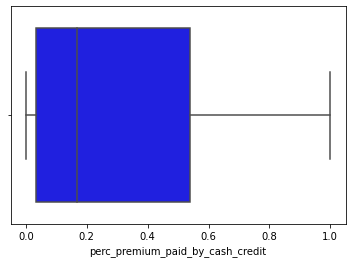

In [12]:
# Plotting boxplot for 'perc_premium_paid_by_cash_credit' column using the 'seaborn' library:
sns.boxplot(train['perc_premium_paid_by_cash_credit'],color='blue')
plt.show()

Starting from the left(0.0):

1. The first vertical line is called Lower Fence. It is the minimum value of 'perc_premium_paid_by_cash_credit' column data.
2. Then the blue box starts. This 1st vertical line of the box is called 1st Quartile. It is 25 percentile of the data.
3. The vertical line inside the blue box is showing the median value or mid value of this column data.
4. The last vertical line of the box is 3rd Quartile. This is 75 percentile of the data.
5. The end line of the plot at point 1.0 is called the Upper Fence. This is the maximum value of this column.

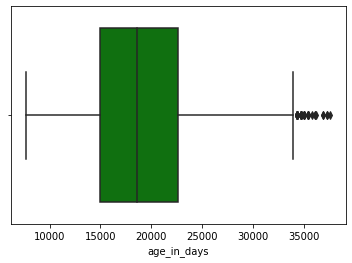

In [13]:
sns.boxplot(train['age_in_days'],color='green')
plt.show()

This plot shows the following:

1. The minimum age of customers on the dataset is less than 10,000 days. ie; the youngest customer is of age less than 10,000 days.
2. 1st Quartile of the age data is 15,000 days.
3. Median age is less than 20,000 days.
4. 3rd Quartile of the age data is near about 22,500 days.
5. The maximum age of customers is more than 35,000 days. ie; the oldest customer is of age more than 35,000 days.

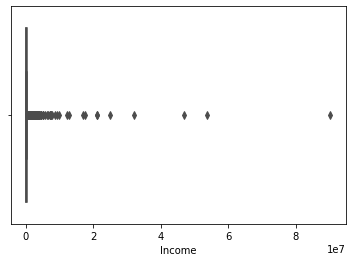

In [14]:
sns.boxplot(train['Income'],color='yellow')
plt.show()

This boxplot shows that majority of customers get income under Rs 1x10^7 (1 crore) per month. Two points between 4 & 6 on the plot show incomes below 5 crores & above 5 crores per month. The maximum income on the dataset is more than Rs 8 crores per month.

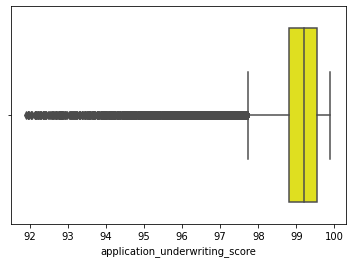

In [15]:
sns.boxplot(train['application_underwriting_score'],color='yellow')
plt.show()

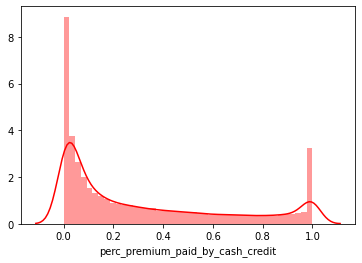

In [16]:
sns.distplot(train['perc_premium_paid_by_cash_credit'],color='red')
plt.show()

This is almost a right-skewed distribution. But it also looks like a little bimodal distribution as there's a small peak at the extreme right as well. But what this really shows is that the percentage of premium amount paid by cash or credit card by maximum customers is around 0. While the percentage of premium amount paid by cash or credit card by a few amount of customers is around 1. This means the mode of the distribution is 0.

In [17]:
train['perc_premium_paid_by_cash_credit'].mode()

0    0.0
dtype: float64

The reason why the plot for 'perc_premium_paid_by_cash_credit' column has so many values in between 0 & 1 is that this column has 'float' values.

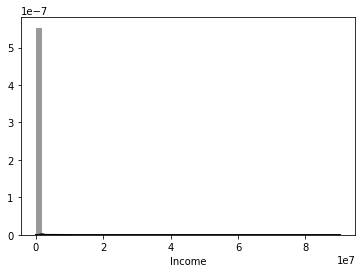

In [18]:
# Checking the 'income' distribution:
sns.distplot(train['Income'],color='black')
plt.show()

This is extremely right skewed distribution. So to make some sense out of this data use variable transformation.

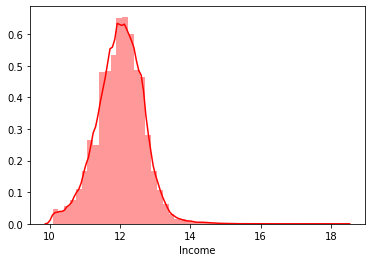

In [19]:
sns.distplot(np.log(train["Income"]),color='red')
plt.show()

In [20]:
np.log(train['Income']).mode()

0    11.919257
dtype: float64

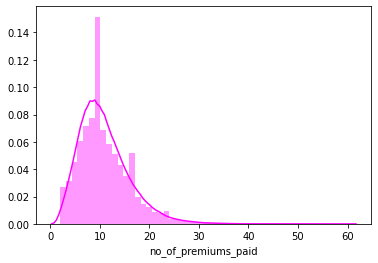

In [21]:
sns.distplot(train['no_of_premiums_paid'],color='magenta')
plt.show()

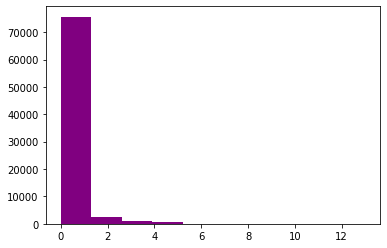

In [22]:
plt.hist(train['Count_3-6_months_late'],histtype='stepfilled',label=str,color='purple',bins=10)
plt.show()

Notice from the distribution plot that although the 'Count_3-6_months_late' variable is considered float by python but it is actually an int variable as it has discrete values & not continuous!
The categorical variables are discrete in nature & are stored as 'object' datatype. During the Univariate analysis of categorical variables, the task is to look for 'count' and 'count%'.



In [23]:
train['Count_3-6_months_late'].value_counts()

0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
6.0        68
7.0        23
8.0        15
9.0         4
11.0        1
12.0        1
13.0        1
10.0        1
Name: Count_3-6_months_late, dtype: int64

In [24]:
train['Count_6-12_months_late'].value_counts()

0.0     75831
1.0      2680
2.0       693
3.0       317
4.0       130
5.0        46
6.0        26
7.0        11
8.0         5
9.0         4
10.0        4
14.0        2
11.0        2
13.0        2
15.0        1
17.0        1
12.0        1
Name: Count_6-12_months_late, dtype: int64

In [25]:
train['Count_more_than_12_months_late'].value_counts()

0.0     76038
1.0      2996
2.0       498
3.0       151
4.0        48
5.0        13
6.0         6
7.0         3
8.0         2
11.0        1
Name: Count_more_than_12_months_late, dtype: int64

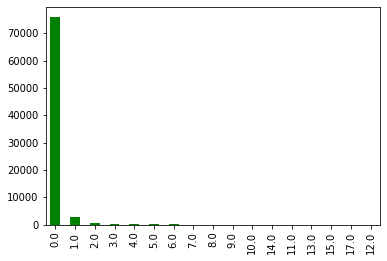

In [26]:
train['Count_6-12_months_late'].value_counts().plot.bar(color='green')
plt.show()

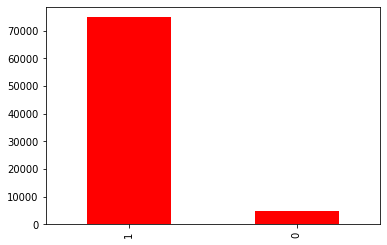

In [27]:
train['target'].value_counts().plot.bar(color='red')
plt.show()

In [28]:
train['target'].value_counts()

1    74855
0     4998
Name: target, dtype: int64

# BIVARIATE ANALYSIS

There are 3 types of Bivariate Analysis. They are:

1. Continuous-Continuous Analysis
2. Categorical-Continuous Analysis
3. Categorical-Categorical Analysis.

# Continuous-Continuous Analysis

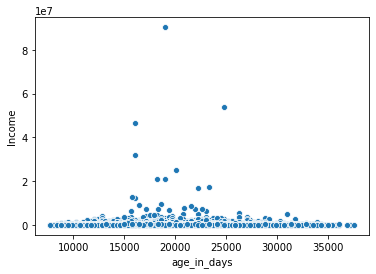

In [29]:
sns.scatterplot(train['age_in_days'],train['Income'])
plt.show()

This plot is telling the following facts:

1. The maximum age of customers in the train dataset is around 38000 days & minimum age is around 4000 days.
2. Majority of the customers earn income less than Rupees 1x10^7 (1 crore) monthly.
3. Few anomalies are present in the income as some customers do earn a lot ranging from Rs 1 crore to Rs 9 crore monthly!
4. The age range of these highly earning individuals lie between 15000 days to 25000 days.

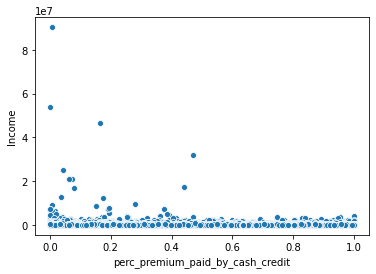

In [30]:
sns.scatterplot(train['perc_premium_paid_by_cash_credit'],train['Income'])
plt.show()

This plot shows the following:

1. The customers who earn less than Rs 1 crore monthly as salary pay 0 to 100 % of their premium by either cash or credit card.
2. The high income customers pay in range 0% to 50% of their premium by either cash or credit card.
3. The customer who earns around 9 crore a month pays 0% premium either by cash or credit card.
4. The customer who earns around 5 crore a month pays 20% premium by cash or credit card.
5. The customer who earns over 3 crore a month pays 50% premium by cash or credit card.
6. It seems the high income group must be using some other means to pay majority of their premium.

# Categorical-Continuous Analysis

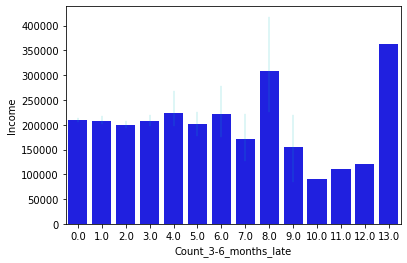

In [31]:
sns.barplot(train['Count_3-6_months_late'],train['Income'],color='b',errcolor='c',errwidth='.26')
plt.show()

The black vertical lines on the tip of some bars represent uncertainty in the data. Anyway, this plot shows the following:

1. All the customers who are late to pay their premiums by 3-6 months earn below Rs 4,00,000 (4 Lakhs) a month.
2. Some customers who earn around Rs 3,50,000 a month but still they are as much as 13 premiums late by 3-6 months.
3. Some customers who earn Rs 3 Lakh a month are 8 premiums late by 3-6 months.
4. Some customers who earn Rs 2 Lakh a month are 0 premiums late.
5. Some customers who earn little less than Rs 1 Lakh per month are upto 10 premiums late.

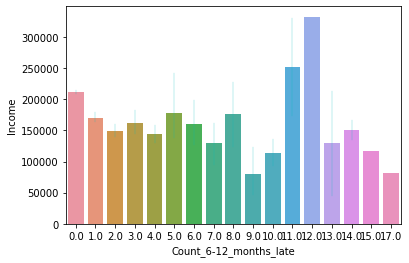

In [32]:
sns.barplot(train['Count_6-12_months_late'],train['Income'],errcolor='c',errwidth='.26')
plt.show()

This plot shows that only those customers who earn Rs 4 lakh & less are in the 6-12 months late category. There are some customers who earn around Rs 75,000 are as much as 17 premiums late by 6-12 months. This category shows even more late-payers than previous category. Let me see the next category to find if there are even more in it than these two categories:

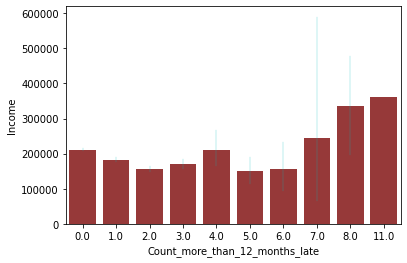

In [33]:
sns.barplot(train['Count_more_than_12_months_late'],train['Income'],color='brown',errcolor='c',errwidth='.26')
plt.show()

So this gives a sigh of relief that there are customers in this category who are atleast not more than 11 premium late unlike the previous category. Some customers who earn around Rs 3,50,000 are 11 premiums late by more than 12 months. And the similar story is told here.

One thing is clear from above 3 plots though that the customers who earn more than Rs 4 lakh a month have been paying their premiums on time. So the insurance company should not be worried atleast about all the rich customers as they seem to be sticking around with the company in near future. Great news! :D

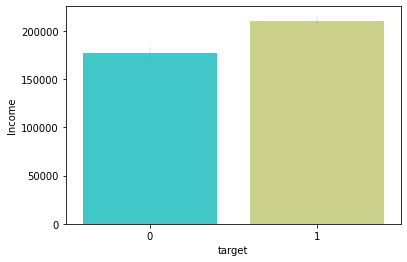

In [34]:
sns.barplot(train['target'],train['Income'],palette='rainbow',errcolor='c',errwidth='.26')
plt.show()

This shows that the customers who earn under Rs 1,80,000 a month are the ones the insurance company should be worried about. As they are the ones who did not pay their premiums on time.

# Categorical-Categorical Analysis

In [35]:
pd.crosstab(train['target'],train['residence_area_type'])

residence_area_type,Rural,Urban
target,,
0,1998,3000
1,29672,45183


This **two-way table** is displaying the following:

1. The number of customers from both rural & urban residence area type who didn't pay their premium on time & also those who payed their premium on time.
2. The number 0 on the target column represents those customers who didn't pay their premium on time.
3. The number 1 on the target column represents the customers who paid their premium on time.
4. The Rural column is showing that there are 1,998 rural customers of the insurance company who didn't pay their premiums on time. Whereas 29,672 rural customers paid their premiums on time.
5. The urban column is showing that there are 3,000 urban customers who didn't pay their premiums on time. On the other hand, there are 45,183 urban customers of the insurance company who paid their premium on time.

In [36]:
pd.crosstab(train['residence_area_type'],train['sourcing_channel'])

sourcing_channel,A,B,C,D,E
residence_area_type,,,,,
Rural,17115,6506,4780,2999,270
Urban,26019,10006,7259,4560,339


This shows the following:

1. 17,115 rural customers prefer the sourcing channel A, whereas 26,019 urban customers prefer channel A.
2. 6,506 rural customers prefer the sourcing channel B, whereas 10,006 urban customers prefer channel B.
3. 4,780 rural customers prefer the sourcing channel C, whereas 7,259 urban customers prefer channel C.
4. 2,999 rural customers prefer the sourcing channel D, whereas 4,560 urban customers prefer channel D.
5. 270 rural customers prefer the sourcing channel E, whereas 339 urban customers prefer channel E.

In [37]:
train['sourcing_channel'].value_counts()/len(train['sourcing_channel'])

A    0.540168
B    0.206780
C    0.150765
D    0.094661
E    0.007627
Name: sourcing_channel, dtype: float64

So 54% of total customers prefer channel A, 20.67% customers prefer channel B, 15% customers prefer channel C, and so on. Clearly A is the most preferred channel whereas E is the least preferred channel among the customers.

In [38]:
train['residence_area_type'].value_counts()

Urban    48183
Rural    31670
Name: residence_area_type, dtype: int64

So the company has 48,183 urban customers & 31,670 rural customers. Now I'll have to see what percentage of total customers are urban/rural:

In [39]:
train['residence_area_type'].value_counts() / len(train['residence_area_type'])

Urban    0.603396
Rural    0.396604
Name: residence_area_type, dtype: float64

So 60.33% of all customers are urban & 39.66% of them are rural.

In [40]:
17115/(17115+26019) , 6506/(6506+10006) , 4780/(4780+7259) , 2999/(2999+4560) , 270/(270+339)

(0.3967867575462512,
 0.39401647286821706,
 0.3970429437660935,
 0.39674560127000924,
 0.4433497536945813)

It can be seen from above result that other than channel E, all other channels are preferred in equal proportion by the customers. But the channel E is comparatively more preferred by the rural customers.

In [41]:
pd.crosstab(train['no_of_premiums_paid'],train['residence_area_type'])

residence_area_type,Rural,Urban
no_of_premiums_paid,,
2,255,471
3,685,1061
4,1178,1729
5,1688,2527
6,2219,3416
7,2620,4003
8,2973,4211
9,2864,4294
10,2699,4174


In [42]:
pd.crosstab(train['residence_area_type'],train['Count_3-6_months_late'])

Count_3-6_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
residence_area_type,,,,,,,,,,,,,,
Rural,26567,3425,996,402,140,62,27,7,9,3,1,0,1,0
Urban,40234,5401,1523,552,234,106,41,16,6,1,0,1,0,1


This shows the following:

* 40,234 urban customers & 26,567 rural customers have 0 premiums due by 3-6 months.
* 5,401 urban customers & 3,425 rural customers have 1 premium due to pay by 3-6 months.
* 106 urban customers & 62 rural customers are 5 premiums late by 3-6 months.
* 1 urban customer & no rural customer is 13 premiums late by 3-6 months.

In [43]:
pd.crosstab(train['residence_area_type'],train['Count_6-12_months_late'])

Count_6-12_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,17.0
residence_area_type,,,,,,,,,,,,,,,,,
Rural,30039,1110,271,130,55,14,11,4,2,1,1,0,1,0,1,0,0
Urban,45792,1570,422,187,75,32,15,7,3,3,3,2,0,2,1,1,1


Here 3 urban & 1 rural customers are late by 10 premiums, 2 urban customers are late by 13 premiums, 1 urban & 1 rural customers are late by 14, 1 urban customer is late by as much as 17 premiums by 6-12 months, etc.

In [44]:
pd.crosstab(train['residence_area_type'],train['Count_more_than_12_months_late'])

Count_more_than_12_months_late,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,11.0
residence_area_type,,,,,,,,,,
Rural,30135,1209,217,58,14,4,2,0,1,0
Urban,45903,1787,281,93,34,9,4,3,1,1


This table shows that the in 'more than 12 month' category, the maximum number of premiums late by an urban customer is 11. While the maximum number of premiums late by a rural customer is 8.

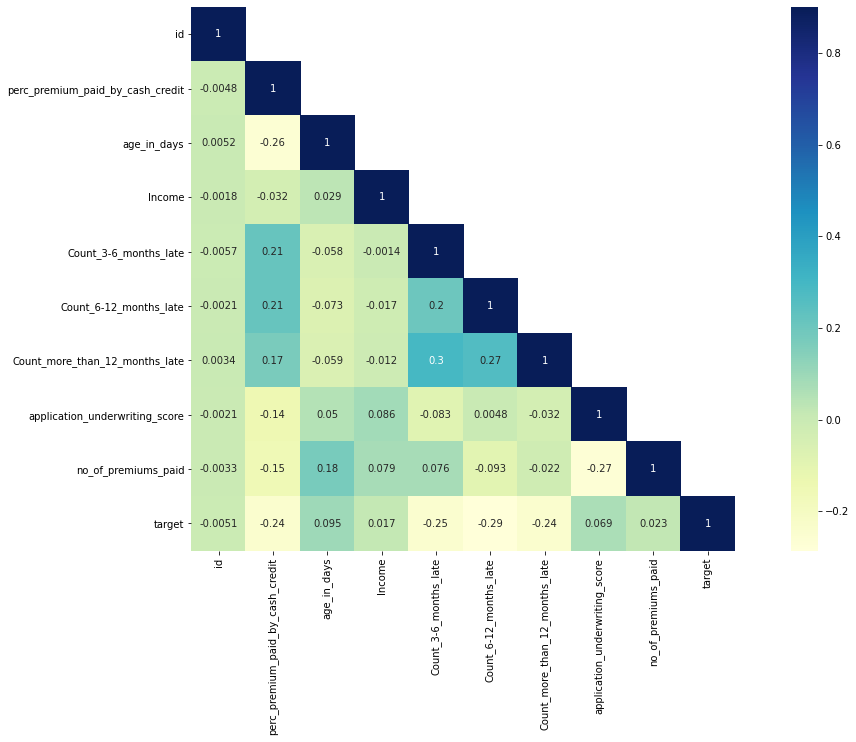

In [45]:
corr= train.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True, cmap='YlGnBu')
plt.show()

This correlation plot is representing the strength as well as direction of correlation between all the variables. For example:

* The 'target' and 'id' variables/columns have a correlation coefficient of -0.0051. This means that these two variables are negatively correlated with each other by a strength of 0.0051. This strength is very weak.
* The 'target' & 'perc_premium_paid_by_cash_credit' variables have a correlation coefficient of -0.24. This means they are also negatively correlated but by a strength of 0.24. Although this strength too is weak but it is comparatively stronger than the previous pair.
*  Negative correlation coefficient means when the value of one variable increases the value of the other one decreases. While positive correlation coefficient means when value of one variable increases the value of other variable also increases.
* 'target' and 'age_in_days' are positively correlated by a weak strength of 0.095.
* It is clear that the strongest strength between target & any other variable is of 0.29 units only. This is a negative correlation between 'target' & 'Count_more_than_12_months_late' columns. This means the more the value of 'count' a customer has, the less he's going to a '1' in his target column. Though the strength of the counts is not that high to give any noticeable difference.

# DATA EXPLORATION AND TRANSFORMATION

----------------------------------------------------------------------------------------------------------------
## Missing Value Investigation:

There may be missing or empty values in the dataset due to either error in data collection or due to some error in reading data. Also, since 'income' is involved in this dataset so there may be some customers who may not be willing to reveal their true income.

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  target                            79853 non-null  int64  
dtypes: f

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                34224 non-null  int64  
 1   perc_premium_paid_by_cash_credit  34224 non-null  float64
 2   age_in_days                       34224 non-null  int64  
 3   Income                            34224 non-null  int64  
 4   Count_3-6_months_late             34193 non-null  float64
 5   Count_6-12_months_late            34193 non-null  float64
 6   Count_more_than_12_months_late    34193 non-null  float64
 7   application_underwriting_score    32901 non-null  float64
 8   no_of_premiums_paid               34224 non-null  int64  
 9   sourcing_channel                  34224 non-null  object 
 10  residence_area_type               34224 non-null  object 
dtypes: float64(5), int64(4), object(2)
memory usage: 2.9+ MB


In [48]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [49]:
train['Count_3-6_months_late'].fillna(0,inplace=True)
train['Count_6-12_months_late'].fillna(0,inplace=True)
train['Count_more_than_12_months_late'].fillna(0,inplace=True)

In [50]:
# Filling up missing values in 'application_underwriting_score column' with the mean of this column:
train['application_underwriting_score'].fillna(train['application_underwriting_score'].mean(),inplace=True)

In [51]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [52]:
test['Count_3-6_months_late'].fillna(0,inplace=True)
test['Count_6-12_months_late'].fillna(0,inplace=True)
test['Count_more_than_12_months_late'].fillna(0,inplace=True)
test['application_underwriting_score'].fillna(test['application_underwriting_score'].mean(),inplace=True)

In [53]:
# Verifying missing values in test dataset
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

In [ ]:
#--> CONVERTING AGE IN DAYS TO YEARS AND DROPPING PREVIOUS ONE 
for dataset in combine: 
    dataset['age'] = dataset['age_in_days']//365
    dataset.drop(['age_in_days'], axis = 1, inplace = True)
train.head()

In [55]:
#GROUPING SOURCING CHANNEL
train[['sourcing_channel', 'target']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,target
0,A,0.945542
1,B,0.935441
2,C,0.924994
3,D,0.916126
4,E,0.924466


We might need to make income groups to understand the relations better

In [56]:
#BINNING INCOME OF THE TRAIN DATASET AND GRPUPING ON THE BASIS OF TARGET
train['Incomeclass'] = pd.cut(train['Income'], 5)
train[['Incomeclass', 'target']].groupby('Incomeclass', as_index = False).count()

,Incomeclass,target
0,"(-66208.57, 18071744.0]",79846
1,"(18071744.0, 36119458.0]",4
2,"(36119458.0, 54167172.0]",2
3,"(54167172.0, 72214886.0]",0
4,"(72214886.0, 90262600.0]",1


In [57]:
#Let's standardize our data by using a standard scaler
scaler = MinMaxScaler()
scaler = scaler.fit(train[['Income']])
xscale = scaler.transform(train[['Income']])
xscale

array([[0.00366839],
       [0.00322611],
       [0.00066612],
       ...,
       [0.00311386],
       [0.00016955],
       [0.00283814]])

In [58]:
#scaler.mean
print(scaler.scale_)

[1.10817359e-08]


In [59]:
#ADDING SCALED INCOME
train['scale_income'] = xscale
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Incomeclass,scale_income
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,1,33,"(-66208.57, 18071744.0]",0.003668
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,1,59,"(-66208.57, 18071744.0]",0.003226
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,0,48,"(-66208.57, 18071744.0]",0.000666
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,1,42,"(-66208.57, 18071744.0]",0.002510
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,1,86,"(-66208.57, 18071744.0]",0.001935


In [60]:
#BINNING INCOMECLASS AS WELL OF THE TRAIN DATASET AND GRPUPING ON THE BASIS OF TARGET
train['Incomeclass'] = pd.cut(train['scale_income'], 5)
train[['Incomeclass', 'target']].groupby('Incomeclass', as_index = False).count()

,Incomeclass,target
0,"(-0.001, 0.2]",79846
1,"(0.2, 0.4]",4
2,"(0.4, 0.6]",2
3,"(0.6, 0.8]",0
4,"(0.8, 1.0]",1


# Outlier Treatment For Income

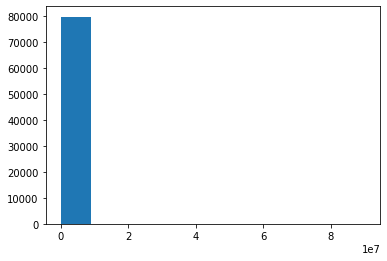

In [61]:
plt.hist(train['Income'])
plt.show()

In [62]:
upper_bound = 0.95
lower_bound = 0.1
result = train['Income'].quantile([lower_bound, upper_bound])
print(result)

0.10     71200.0
0.95    450050.0
Name: Income, dtype: float64


So, we can collect all the values in this range and let go of the other ones.

In [63]:
true_index = (train['Income'] < result.loc[upper_bound])
true_index

0        True
1        True
2        True
3        True
4        True
         ... 
79848    True
79849    True
79850    True
79851    True
79852    True
Name: Income, Length: 79853, dtype: bool

In [64]:
false_index = ~true_index

In [65]:
no_outlier_train = train[true_index].copy()
no_outlier_train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Incomeclass,scale_income
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,1,33,"(-0.001, 0.2]",0.003668
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,1,59,"(-0.001, 0.2]",0.003226
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,0,48,"(-0.001, 0.2]",0.000666
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,1,42,"(-0.001, 0.2]",0.002510
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,1,86,"(-0.001, 0.2]",0.001935


In [66]:
no_outlier_train.describe()
#removed some outliers from every features availaible

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target,age,scale_income
count,75846.000000,75846.000000,75846.000000,75846.000000,75846.000000,75846.000000,75846.000000,75846.000000,75846.000000,75846.000000,75846.000000
mean,57143.950980,0.316423,177177.155552,0.248134,0.080426,0.061137,99.053832,10.715502,0.936516,51.459563,0.001697
std,32928.877051,0.336727,92917.340492,0.690633,0.443489,0.314199,0.736181,5.073467,0.243833,14.417318,0.001030
min,2.000000,0.000000,24030.000000,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000,21.000000,0.000000
25%,28632.750000,0.033000,105090.000000,0.000000,0.000000,0.000000,98.820000,7.000000,1.000000,41.000000,0.000898
50%,57199.500000,0.168000,160555.000000,0.000000,0.000000,0.000000,99.170000,10.000000,1.000000,51.000000,0.001513
75%,85616.750000,0.544000,237560.000000,0.000000,0.000000,0.000000,99.520000,13.000000,1.000000,62.000000,0.002366
max,114076.000000,1.000000,450040.000000,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000,103.000000,0.004721


In [67]:
#Let's make groups for the new income range

In [68]:
#BINNING INCOMECLASS AS WELL OF THE TRAIN DATASET AND GRPUPING ON THE BASIS OF TARGET
no_outlier_train['Incomeclass'] = pd.cut(no_outlier_train['Income'], 5)
no_outlier_train[['Incomeclass', 'target']].groupby('Incomeclass', as_index = False).count()

,Incomeclass,target
0,"(23603.99, 109232.0]",20493
1,"(109232.0, 194434.0]",26922
2,"(194434.0, 279636.0]",16575
3,"(279636.0, 364838.0]",8587
4,"(364838.0, 450040.0]",3269


In [ ]:
#-->dividing income into a proper classes
combine = [train, test]
for dataset in combine: 
    dataset.loc[ dataset['Income'] <= 23603.99, 'Income'] = 0
    dataset.loc[(dataset['Income'] > 23603.99) & (dataset['Income'] <= 109232.0), 'Income'] = 1
    dataset.loc[(dataset['Income'] > 109232.0) & (dataset['Income'] <= 194434.0), 'Income'] = 2
    dataset.loc[(dataset['Income'] > 194434.0) & (dataset['Income'] <= 279636.0), 'Income'] = 3
    dataset.loc[(dataset['Income'] > 279636.0) & (dataset['Income'] <= 364838.0), 'Income'] = 4
    dataset.loc[(dataset['Income'] > 364838.0) & (dataset['Income'] <= 450040.0), 'Income'] = 5
    dataset.loc[ dataset['Income'] > 450040.0, 'Income'] = 6
    
train.head()

In [70]:
train.loc[false_index, 'Income'] = 5
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Incomeclass,scale_income
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,33,"(-0.001, 0.2]",0.003668
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,59,"(-0.001, 0.2]",0.003226
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,48,"(-0.001, 0.2]",0.000666
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,42,"(-0.001, 0.2]",0.002510
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,86,"(-0.001, 0.2]",0.001935


In [71]:
train.drop(['Incomeclass', 'scale_income'], axis = 1, inplace = True)
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,33
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,59
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,48
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,42
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,86


In [72]:
train['Ageclass'] = pd.cut(train['age'], 5)
train[['Ageclass', 'target']].groupby('Ageclass', as_index = False).count()

,Ageclass,target
0,"(20.918, 37.4]",14314
1,"(37.4, 53.8]",30585
2,"(53.8, 70.2]",26773
3,"(70.2, 86.6]",7531
4,"(86.6, 103.0]",650


The Age feature lies between 20 to 103.

In [73]:
#-->assigning numbers to the ageclass
for dataset in combine:    
    dataset.loc[ dataset['age'] <= 37.4, 'age'] = 0
    dataset.loc[(dataset['age'] > 37.4) & (dataset['age'] <= 53.8), 'age'] = 1
    dataset.loc[(dataset['age'] > 53.8) & (dataset['age'] <= 70.2), 'age'] = 2
    dataset.loc[(dataset['age'] > 70.2) & (dataset['age'] <= 86.6), 'age'] = 3
    dataset.loc[ dataset['age'] > 86.6, 'age'] = 4
combine = [train, test]
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Ageclass
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,0,"(20.918, 37.4]"
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,2,"(53.8, 70.2]"
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,1,"(37.4, 53.8]"
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,1,"(37.4, 53.8]"
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,3,"(70.2, 86.6]"


In [74]:
train.drop('Ageclass', axis = 1, inplace = True)

In [75]:
#grouping of mean und_score based on the ageclass
train[['age', 'application_underwriting_score']].groupby('age').mean()

,application_underwriting_score
age,
0,99.141770
1,98.980475
2,99.057933
3,99.280611
4,99.426081


In [76]:
#binning the number of premium paid
train['Premiumclass'] = pd.cut(train['no_of_premiums_paid'], 5)

In [77]:
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Premiumclass
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,0,"(1.942, 13.6]"
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,2,"(13.6, 25.2]"
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,1,"(1.942, 13.6]"
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,1,"(1.942, 13.6]"
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,3,"(1.942, 13.6]"


In [78]:
#grouping premiums based on the application_underwriting _scores
train[['Premiumclass', 'application_underwriting_score']].groupby('Premiumclass').count()

,application_underwriting_score
Premiumclass,
"(1.942, 13.6]",59621
"(13.6, 25.2]",19111
"(25.2, 36.8]",1036
"(36.8, 48.4]",64
"(48.4, 60.0]",21


In [79]:
print(train['application_underwriting_score'].mean())
print(train['application_underwriting_score'].std())

99.06729119785817
0.7258917962507657


In [80]:
print(train[train['sourcing_channel'] == 'A']['application_underwriting_score'].std())

0.7496167766242375


In [81]:
#grouping the sourcing channel
train[['sourcing_channel', 'target']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,target
0,A,0.945542
1,B,0.935441
2,C,0.924994
3,D,0.916126
4,E,0.924466


In [82]:
print(train[train['sourcing_channel'] == 'C']['application_underwriting_score'].std())

0.7371067737825557


In [83]:
train[['sourcing_channel', 'application_underwriting_score']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,application_underwriting_score
0,A,99.100633
1,B,99.056158
2,C,98.980934
3,D,99.038835
4,E,99.067969


In [84]:
train[['residence_area_type', 'application_underwriting_score']].groupby('residence_area_type', as_index = False).mean()

,residence_area_type,application_underwriting_score
0,Rural,99.062890
1,Urban,99.070184


setting the value of underwriting score based on the sourcing channel. 

In [86]:
combine = [train, test]
for dataset in combine: 
    mask1 = dataset['application_underwriting_score'].isnull()
    for source in ['A', 'B', 'C', 'D', 'E']:
        mask2 = (dataset['sourcing_channel'] == source)
        source_mean = dataset[dataset['sourcing_channel'] == source]['application_underwriting_score'].mean()
        dataset.loc[mask1 & mask2, 'application_underwriting_score'] = source_mean

In [87]:
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Premiumclass
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,0,"(1.942, 13.6]"
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,2,"(13.6, 25.2]"
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,1,"(1.942, 13.6]"
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,1,"(1.942, 13.6]"
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,3,"(1.942, 13.6]"


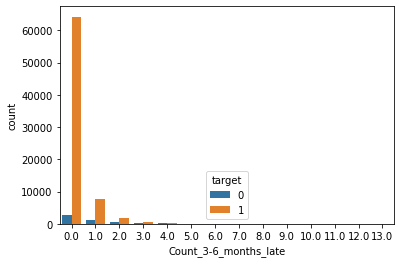

In [90]:
#visualizing late premiums to treat missing value and outliers
sns.countplot(x = 'Count_3-6_months_late', data = train, hue = 'target')

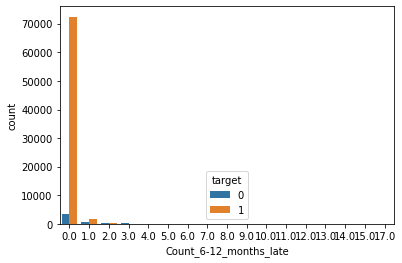

In [91]:
sns.countplot(x = 'Count_6-12_months_late', data = train, hue = 'target')

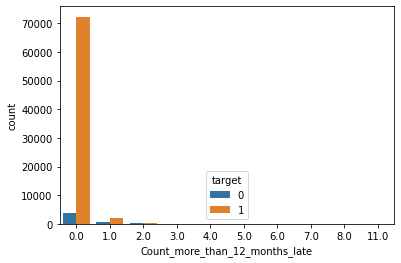

In [92]:
sns.countplot(x = 'Count_more_than_12_months_late', data = train, hue = 'target')

In [93]:
#intoducing late_premium for all the late premiums
combine = [train, test]
for dataset in combine: 
    dataset['late_premium'] = 0.0


In [94]:
#-->finding late premiums and adding]
combine = [train, test]
for dataset in combine:
        dataset.loc[(dataset['Count_3-6_months_late'].isnull()),  'late_premium'] = np.NaN
        dataset.loc[(dataset['Count_3-6_months_late'].notnull()), 'late_premium'] = dataset['Count_3-6_months_late'] + dataset['Count_6-12_months_late'] + dataset['Count_more_than_12_months_late']
        

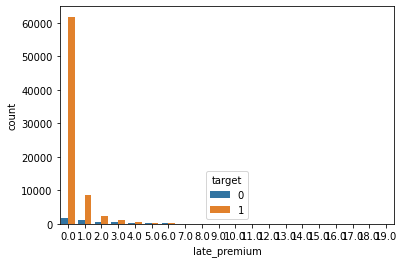

In [95]:
sns.countplot(x = 'late_premium', data = train, hue = 'target')

In [96]:
#assuming that max late premiums are 7 and min is 2 

In [97]:
train[['late_premium', 'target']].groupby('late_premium').mean()

,target
late_premium,
0.0,0.970760
1.0,0.890487
2.0,0.780694
3.0,0.695418
4.0,0.579800
5.0,0.510684
6.0,0.441696
7.0,0.487654
8.0,0.455556


In [98]:
#if late premium is null and target is 0 then loan not granted and max is 7
#if late premium is null and target is 1 then loan granted and min is 2
#if 
train.loc[(train['target'] == 0) & (train['late_premium'].isnull()),'late_premium'] = 7
train.loc[(train['target'] == 1) & (train['late_premium'].isnull()),'late_premium'] = 2

In [99]:
train.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age,Premiumclass,late_premium
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,0,1,"(1.942, 13.6]",6.0
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,1,3,"(1.942, 13.6]",0.0


In [102]:
#missing value treatment in test dataset due unknown target variable by putting median
prem = np.zeros(5)
for dataset in [test]:
    for i in range(1, 6):
        df = dataset[(dataset['Income'] == i)]['late_premium'].dropna()
        premium_guess = df.median()
        prem[i - 1] = int(premium_guess) 

    for j in range(1, 6):
        dataset.loc[(dataset.late_premium.isnull()) & (dataset.Income == j), 'late_premium'] = prem[j - 1] + 1

    dataset['late_premium'] = dataset['late_premium'].astype(int)

In [103]:
train.drop(['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late'], axis = 1, inplace = True)

In [104]:
test.drop(['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late'], axis = 1, inplace = True)

In [122]:
#--> tranforming Area Type and sourcing channel to numerical values using dictionary
combine = [train, test]
for dataset in combine: 
    dataset['residence_area_type'] = dataset['residence_area_type'].map( {'Urban' : 1, 'Rural' : 0} )
    dataset['sourcing_channel'] = dataset['sourcing_channel'].map( {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4} )

In [106]:
#-->
train['application_underwriting_score'] = train['application_underwriting_score']/100

In [107]:
#treating number of premiums
result = train['no_of_premiums_paid'].quantile([.95])
print(result)

0.95    20.0
Name: no_of_premiums_paid, dtype: float64


In [108]:
true_index = train['no_of_premiums_paid'] < result.loc[.95]
false_index = ~true_index
true_index

0         True
1        False
2         True
3         True
4         True
         ...  
79848     True
79849     True
79850     True
79851     True
79852     True
Name: no_of_premiums_paid, Length: 79853, dtype: bool

In [109]:
train['Premiumclass'] = pd.cut(train[true_index]['no_of_premiums_paid'], 4)
train[['Premiumclass', 'application_underwriting_score']].groupby('Premiumclass').count()

,application_underwriting_score
Premiumclass,
"(1.983, 6.25]",15229
"(6.25, 10.5]",27838
"(10.5, 14.75]",20542
"(14.75, 19.0]",11244


In [110]:
#converting percentage premiums
train['Premiumclass'] = pd.cut(train['perc_premium_paid_by_cash_credit'], 4)
train[['Premiumclass', 'target']].groupby('Premiumclass').mean()

,target
Premiumclass,
"(-0.001, 0.25]",0.976381
"(0.25, 0.5]",0.945482
"(0.5, 0.75]",0.900194
"(0.75, 1.0]",0.817460


In [111]:
#-->
combine = [train, test]
for dataset in combine: 
    dataset.loc[ dataset['perc_premium_paid_by_cash_credit'] <= 0.25, 'perc_premium_paid_by_cash_credit'] = 0
    dataset.loc[(dataset['perc_premium_paid_by_cash_credit'] > 0.25) & (dataset['perc_premium_paid_by_cash_credit'] <= 0.5), 'perc_premium_paid_by_cash_credit'] = 1
    dataset.loc[(dataset['perc_premium_paid_by_cash_credit'] > 0.5) & (dataset['perc_premium_paid_by_cash_credit'] <= 0.75), 'perc_premium_paid_by_cash_credit'] = 2
    dataset.loc[ dataset['perc_premium_paid_by_cash_credit'] > 0.75, 'perc_premium_paid_by_cash_credit'] = 3
train.drop('Premiumclass', axis = 1, inplace = True)

In [112]:
train[['perc_premium_paid_by_cash_credit', 'late_premium']] = train[['perc_premium_paid_by_cash_credit', 'late_premium']].astype(int)
test[['perc_premium_paid_by_cash_credit']] = test[['perc_premium_paid_by_cash_credit']].astype(int)

DataFrame.astype() method is used to cast a pandas object to a specified dtype. astype() function also provides the capability to convert any suitable existing column to categorical type.

# MODEL BUILDING

In [113]:
X_train = train.drop(['id', 'target','perc_premium_paid_by_cash_credit'], axis = 1).copy()
y_train = train['target']
X_test = test.drop(['id', 'perc_premium_paid_by_cash_credit'], axis = 1).copy()
print(X_train.shape, y_train.shape, X_test.shape)

(79853, 7) (79853,) (34224, 7)


# logistic Regression

In [114]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print("y_pred")
print(y_pred)

score_logreg = round(logreg.score(X_train, y_train) * 100, 2)
print("Score")
print(score_logreg)

conf_mat = confusion_matrix(logreg.predict(X_train),y_train)
print("Confusion Matrix")
print(conf_mat)

print("Classification Report")
print(classification_report(logreg.predict(X_train),y_train))

tnr = np.round(conf_mat[0][0]/(conf_mat[0][0] + conf_mat[1][0]) * 100,3)
tpr = np.round(conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1]) * 100,3)
fpr = np.round(conf_mat[1][0] / (conf_mat[1][0] + conf_mat[0][0]) * 100,3)
print('TPR = ',tpr,'%')
print('TNR = ',tnr,'%')
print('FPR = ',fpr,'%')

y_pred
[1 1 1 ... 1 1 1]
Score
93.86
Confusion Matrix
[[  545   449]
 [ 4453 74406]]
Classification Report
              precision    recall  f1-score   support

           0       0.11      0.55      0.18       994
           1       0.99      0.94      0.97     78859

    accuracy                           0.94     79853
   macro avg       0.55      0.75      0.58     79853
weighted avg       0.98      0.94      0.96     79853

TPR =  99.4 %
TNR =  10.904 %
FPR =  89.096 %


# K-Nearest Neighbor

# Decision Tree

In [115]:
dec = DecisionTreeClassifier(max_depth = 4)
dec.fit(X_train, y_train)

y_pred = dec.predict(X_test)
print("y_pred")
print(y_pred)

score_dec = round(dec.score(X_train, y_train) * 100, 2)
print("Score")
print(score_dec)

conf_mat = confusion_matrix(dec.predict(X_train),y_train)
print("Confusion Matrix")
print(conf_mat)

print("Classification Report")
print(classification_report(dec.predict(X_train),y_train))

tnr = np.round(conf_mat[0][0]/(conf_mat[0][0] + conf_mat[1][0]) * 100,3)
tpr = np.round(conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1]) * 100,3)
fpr = np.round(conf_mat[1][0] / (conf_mat[1][0] + conf_mat[0][0]) * 100,3)
print('TPR = ',tpr,'%')
print('TNR = ',tnr,'%')
print('FPR = ',fpr,'%')

y_pred
[1 1 1 ... 1 1 1]
Score
93.9
Confusion Matrix
[[  562   432]
 [ 4436 74423]]
Classification Report
              precision    recall  f1-score   support

           0       0.11      0.57      0.19       994
           1       0.99      0.94      0.97     78859

    accuracy                           0.94     79853
   macro avg       0.55      0.75      0.58     79853
weighted avg       0.98      0.94      0.96     79853

TPR =  99.423 %
TNR =  11.244 %
FPR =  88.756 %


# Random Forest

In [116]:
ran = RandomForestClassifier(n_estimators = 91)
ran.fit(X_train, y_train)

y_pred = ran.predict(X_test)
ran.score(X_train, y_train)
print("y_pred")
print(y_pred)

score_ran = round(ran.score(X_train, y_train) * 100, 2)
print("Score")
print(score_ran)

conf_mat = confusion_matrix(ran.predict(X_train),y_train)
print("Confusion Matrix")
print(conf_mat)

print("Classification Report")
print(classification_report(ran.predict(X_train),y_train))

tnr = np.round(conf_mat[0][0]/(conf_mat[0][0] + conf_mat[1][0]) * 100,3)
tpr = np.round(conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1]) * 100,3)
fpr = np.round(conf_mat[1][0] / (conf_mat[1][0] + conf_mat[0][0]) * 100,3)
print('TPR = ',tpr,'%')
print('TNR = ',tnr,'%')
print('FPR = ',fpr,'%')

y_pred
[1 1 1 ... 1 1 1]
Score
99.23
Confusion Matrix
[[ 4426    42]
 [  572 74813]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4468
           1       1.00      0.99      1.00     75385

    accuracy                           0.99     79853
   macro avg       0.94      0.99      0.97     79853
weighted avg       0.99      0.99      0.99     79853

TPR =  99.944 %
TNR =  88.555 %
FPR =  11.445 %


In [117]:
with open('random','wb') as file:
    pickle.dump(ran,file)

In [118]:
#TABULATING ALL ACCURACY OF ALL ABOVE MODEL 
pred_values = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest','Decision Tree'],
    'Score': [score_logreg, 
              score_ran,score_dec]})
pred_values.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,99.23
2,Decision Tree,93.90
0,Logistic Regression,93.86


In [127]:
ran.predict([['1','.9869','7','2','0','1','6']])

array([0], dtype=int64)